# Houses Price Predictor<a name = 'beginning'></a>    


In this project I will apply Pipelines for data preprocessing. This is a purely learning project.    


The data was taken from the Kaggle database [kaggle.com](https://www.kaggle.com/)  

### Problem statement  

> to determine the price of house   
    
### Goals of this project   

* Practice EDA: Data Loading, Data Familiarization, Data Visualization;   
* Practice Preprocessing using Pipelines;  
* Practice Model Evaluation using Cross-Validation.   

### Steps   

* [Data Loading and Femilirization](#loading)   
* [Selecting Features for Model Training](#features_selection)    
* [Splitting Data](#splitting)   
* [Pipeline Creating](#pipeline)     
* [Model Training](#training)      
* [Model Evaluation](#evaluation)    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Data Loading<a name = 'loading'></a>    

[The Beginning](#beginning)  

In [3]:
file_path = 'C:/Users/samur/Desktop/My Machine Learning/GitHub/Houses-price-predictor-using-Pipeline/data/train.csv'

data = pd.read_csv(file_path, index_col = 'Id')

In [4]:
print(data.shape, '\n')

print(data.dtypes, '\n')

data.head()

(1460, 80) 

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object 



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Selecting Features for Model Training<a name = 'features_selection'></a>    

[The Beginning](#beginning)  

## Data Splitting<a name = 'splitting'></a>    

[The Beginning](#beginning)

In [5]:
y = data['SalePrice']

X = data.copy()

X.drop(columns = 'SalePrice', axis = 1, inplace = True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 0)

## Pipeline Creating<a name = 'pipeline'></a>     

[The Beginning](#beginning)   

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

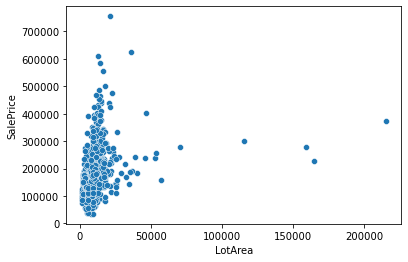

In [6]:
sns.scatterplot(x = X_train['LotArea'], y = y_train)

In [7]:
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [8]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 999))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [9]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [10]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

## Model Training<a name = 'training'></a>     

[The Beginning](#beginning)

In [11]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)

scores = -1 * cross_val_score (my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

print(scores.mean())

print(y.mean())

17389.847390410963
180921.19589041095


In [12]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators, random_state = 0))
                             ])
    scores = -1 * cross_val_score (my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
    return scores.mean()

In [13]:
results = {} 

number_of_trees = [50, 100, 150, 200, 250, 300, 350, 400]

for num in number_of_trees:
    results[num] = get_score(num)

In [14]:
print(results)

{50: 17587.770260273974, 100: 17389.847390410963, 150: 17388.63710045662, 200: 17383.54548630137, 250: 17411.627572602738, 300: 17403.39519634703, 350: 17397.838966731902, 400: 17426.142296232876}


<AxesSubplot:>

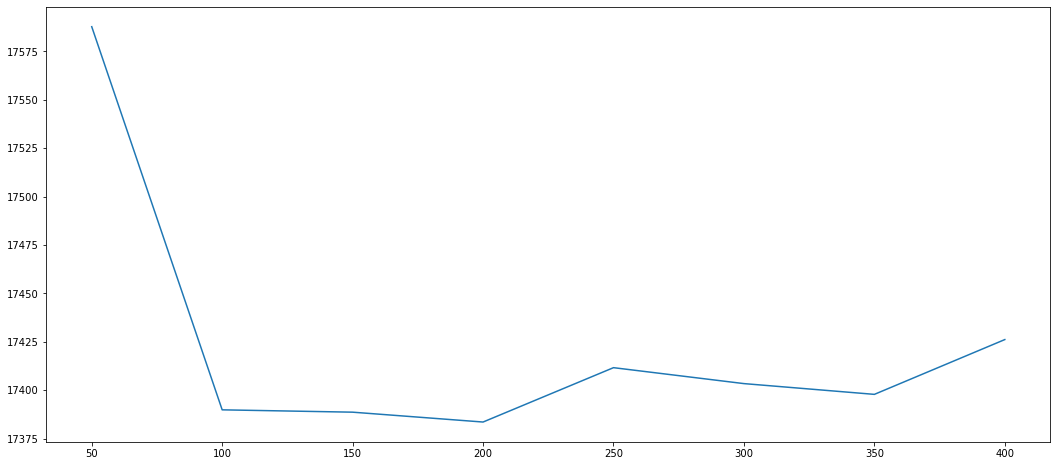

In [15]:
plt.figure(figsize=(18, 8))
sns.lineplot(data = results)

The model shows the best result at `200` trees. We rewrite the model by passing the best parameters to it. 

In [16]:
model = RandomForestRegressor(n_estimators = 200, random_state = 0)

In [17]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [18]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)

scores = -1 * cross_val_score (my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

print(scores.mean())

print(y.mean())

17383.54548630137
180921.19589041095


Slightly more accurate result received

## Model Evaluation <a name = 'evaluation'></a>    

[The Beginning](#beginning)  

In [20]:
print(data.shape)

list(data.columns)


(1460, 80)


['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc